##### **Installing Libraries**

In [1]:
#!pip install talos # hyperparameter tuning
#!pip install --upgrade pip

First of All I am going to Import **libraries** that will be usefull for this project

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
import seaborn as sns # for Visualizing my data
from keras.utils import to_categorical # Using keras to_categorical because I need to convert by labels 
# into categorical form
import os # for taking input to my dataframe
import cv2 # for resizing my iamges
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
# not needed in Kaggle, but required in Jupyter
%matplotlib inline 



Using TensorFlow backend.


diabetic-retinopathy-detection
prepossessed-arrays-of-binary-data



In [3]:
# Here I am building my dataframe (taking patient id  from image coloum and seperating side of image 
# left or right specefying path of image and at last converting my labels into categorical labels)
temp_df=pd.read_csv('../input/diabetic-retinopathy-detection/trainLabels.csv') # uploading csv to my pandas dataframe
print(temp_df.head()) # displaying first 5 objects in dataframe
image=temp_df['image'].str.split('_',n=1,expand=True) #splitting Side and Patient ID 
df = pd.DataFrame()# creating new dataframe object
df['eye_side']=image[1] #taking side of Image
df['patient_id']=image[0]#taking patient id of an Image

df['path']='../input/diabetic-retinopathy-detection/'#Giving paths of the images 
df['path']=df['path'].str.cat(temp_df['image']+'.jpeg')#adding Image path and format 
df['exists'] = df['path'].map(os.path.exists)
df=df[df['exists']]
df['level']=temp_df['level']# taking levels of Image
df['level_cat'] = df['level'].map(lambda x: to_categorical(x, 1+df['level'].max()))#converting my 
# labels to categorical_labels
df.head()

      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1


,eye_side,patient_id,path,exists,level,level_cat
0,left,10,../input/diabetic-retinopathy-detection/10_lef...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
1,right,10,../input/diabetic-retinopathy-detection/10_rig...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
2,left,13,../input/diabetic-retinopathy-detection/13_lef...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
3,right,13,../input/diabetic-retinopathy-detection/13_rig...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
4,left,15,../input/diabetic-retinopathy-detection/15_lef...,True,1,"[0.0, 1.0, 0.0, 0.0, 0.0]"


**Visualization**


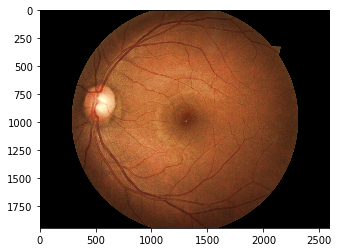

In [4]:
im = plt.imread(df.path.values[2]) # reading Image from its path

plt.imshow(im)# show the image
plt.show()

In [5]:
sizes = df['level'].values #taking values from series because I only want to visualize levels nt index
print(sizes[0:5])#printing first 5 values


[0 0 0 0 1]


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


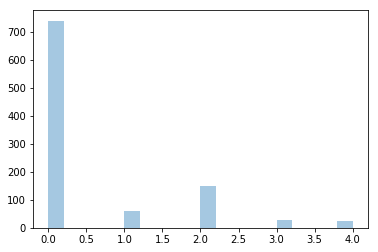

In [6]:
sns.distplot(sizes, kde=False); # Visualizing levels in dataset

In [7]:
pd.value_counts(sizes) # viewing the values of levels

0    739
2    148
1     59
3     28
4     26
dtype: int64

In [8]:
import PIL
from PIL import Image
baseheight = 128
img = Image.open('../input/diabetic-retinopathy-detection/1192_right.jpeg')

wsize = 128
img = img.resize((wsize, baseheight), PIL.Image.ANTIALIAS)
img.save('resized_image.jpg')# i need this for storing my previous image also 

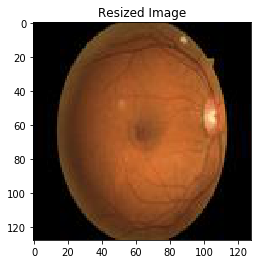

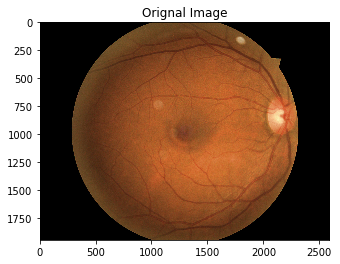

In [9]:
im = plt.imread('resized_image.jpg') # reading Image from its path

plt.imshow(im)# show the image
plt.title("Resized Image")
plt.show()

im = plt.imread('../input/diabetic-retinopathy-detection/1192_right.jpeg') # reading Image from its path

plt.imshow(im)# show the image
plt.title("Orignal Image")
plt.show()

In [10]:
#total Examples of LEVEL [1,2,3,4] So that we are able to make balanced dataset
sum_E=0
for i in range (1,5):
    L1_df=pd.DataFrame()# creating new dataframe object
    L1_df =df [df.level==i]
    x=len(L1_df)
    sum_E=x+sum_E
print(sum_E)

261


So we will take **261** **examples from eye having** **level 0 and 261 examples from  level[1,2,3,4]**

**almost 70% of 0 DR and 30% of 1DR **

**Making of Binary dataframe**


B_df=pd.DataFrame()
#making secondary dataset having small number of sample 
#taking examples where level=0

L0_df=df[df.level==0 ]





L1_df=pd.DataFrame()# creating new dataframe object
L1_df=df[df.level==1 ]
L1_df=L1_df.drop('level_cat',axis=1)



L2_df=pd.DataFrame()# creating new dataframe object
L2_df=df[df.level==2 ]




L3_df=pd.DataFrame()# creating new dataframe object
L3_df=df[df.level==3] 
L3_df=L3_df.drop('level_cat',axis=1)



L4_df=pd.DataFrame()# creating new dataframe object
L4_df=df[df.level==4 ]
L4_df=L4_df.drop('level_cat',axis=1)


#Combining Examples of level [1,2,3,4]
frames = [ L1_df, L2_df,L3_df,L4_df]
L1_df = pd.concat(frames)
L1_df=L1_df.replace(({'level' : { 2 : 1, 3 : 1, 4 : 1 }}))


frames = [ L0_df,L1_df]
B_df = pd.concat(frames,sort=True)
B_df=B_df.drop('level_cat',axis=1)
B_df['level_cat'] = B_df['level'].map(lambda x: to_categorical(x, 1+B_df['level'].max()))#converting my 
# labels to categorical_labels
#Adding New Categorical Lables according to Binary Dataset

print("Total Numbe of examples in Binary DataFrame = " + str(len(B_df)))  # Total Examples

sizes =B_df['level'].values
sns.distplot(sizes, kde=False); # Visualizing levels in dataset

**Saving My Binary dataset and binary sizes (90,128,264) of images which are on same indexs **

**Saving Binary Dataset**

len(B_df)

B_df.to_csv("Binary Dataframe")


**Resizing image array to (90,90)**

#resizing my training examples to (90,90)
#train examples
from PIL import Image
from skimage.transform import resize 

image_list=[]

for i in range (len(B_df)):
    image=plt.imread(B_df['path'].iloc[i])
    image = resize(image, (90, 90))
    image_list.append(image)
    

**Resizing image array to (128,128)**

#resizing my training examples to (128,128)
#train examples
from PIL import Image
from skimage.transform import resize 

image_list_128=[]
for i in B_df['path']:
    image=plt.imread(i)
    image = resize(image, (128, 128))
    image_list_128.append(image)

**Resizing image array to (264,264)**

#resizing my training examples to (264,264)
#train examples
from PIL import Image
from skimage.transform import resize 

image_list_264=[]
for i in B_df['path']:
    image=plt.imread(i)
    image = resize(image, (264, 264))
    image_list_264.append(image)

**Only resizing took my 3:00 hours in Kaggle** So I am storing my preprocess data

**Saving Numpy array to files**

img_list=np.asarray(image_list)
img_list=img_list.reshape(1000,90*90*3)
print(img_list.shape)
type(img_list)
np.savez_compressed('1000_Binary_images_data_90', a=img_list)

img_list_128=np.asarray(image_list_128)
img_list_128=img_list_128.reshape(1000,128*128*3)
print(img_list_128.shape)
type(img_list_128)
np.savez_compressed('1000_Binary_images_data_128', a=img_list_128)

img_list_264=np.asarray(image_list_264)
img_list_264=img_list_264.reshape(1000,264*264*3)
print(img_list_264.shape)
type(img_list_264)
np.savez_compressed('1000_Binary_images_data_264', a=img_list_264)

**loading my saving Binary data**

In [11]:
B_df=pd.read_csv('../input/prepossessed-arrays-of-binary-data/1000_Binary Dataframe')
B_df=B_df.drop('Unnamed: 0',axis=1)
B_df.head(10)

,exists,eye_side,level,path,patient_id,level_cat
0,True,left,0,../input/diabetic-retinopathy-detection/10_lef...,10,[1. 0.]
1,True,right,0,../input/diabetic-retinopathy-detection/10_rig...,10,[1. 0.]
2,True,left,0,../input/diabetic-retinopathy-detection/13_lef...,13,[1. 0.]
3,True,right,0,../input/diabetic-retinopathy-detection/13_rig...,13,[1. 0.]
4,True,left,0,../input/diabetic-retinopathy-detection/17_lef...,17,[1. 0.]
5,True,left,0,../input/diabetic-retinopathy-detection/19_lef...,19,[1. 0.]
6,True,right,0,../input/diabetic-retinopathy-detection/19_rig...,19,[1. 0.]
7,True,left,0,../input/diabetic-retinopathy-detection/20_lef...,20,[1. 0.]
8,True,right,0,../input/diabetic-retinopathy-detection/20_rig...,20,[1. 0.]
9,True,left,0,../input/diabetic-retinopathy-detection/21_lef...,21,[1. 0.]


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


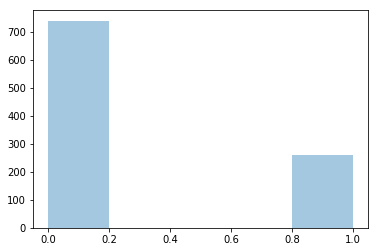

In [12]:
sizes =B_df['level'].values
sns.distplot(sizes, kde=False); # Visualizing levels in dataset

**loading My numpy array which I saved**

In [13]:
Binary_90 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_90.npz')
X_90=Binary_90['a']
Binary_128 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_128.npz')
X_128=Binary_128['a']
Binary_264 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_264.npz')
X_264=Binary_264['a']
y=B_df['level'].values


print(X_90.shape)
print(X_128.shape)
print(X_264.shape)
print(y.shape)

(1000, 24300)
(1000, 49152)
(1000, 209088)
(1000,)


In [14]:
# we need to resize our X because we load array in 2 diminsional and we need it in 4 diminsional
print("Shape before reshaping X_90" +str(X_90.shape))
X_90=X_90.reshape(1000,90,90,3)
print("Shape after reshaping X_90" +str(X_90.shape))
print("\n\n")

print("Shape before reshaping X_128" +str(X_128.shape))
X_128=X_128.reshape(1000,128,128,3)
print("Shape after reshaping X_128" +str(X_128.shape))
print("\n\n")

print("Shape before reshaping X_264" +str(X_264.shape))
X_264=X_264.reshape(1000,264,264,3)
print("Shape after reshaping X_264" +str(X_264.shape))


Shape before reshaping X_90(1000, 24300)
Shape after reshaping X_90(1000, 90, 90, 3)



Shape before reshaping X_128(1000, 49152)
Shape after reshaping X_128(1000, 128, 128, 3)



Shape before reshaping X_264(1000, 209088)
Shape after reshaping X_264(1000, 264, 264, 3)


**Confirming that image path on 1st index of data frame is same as the image at 1st index of the Np Arrays**

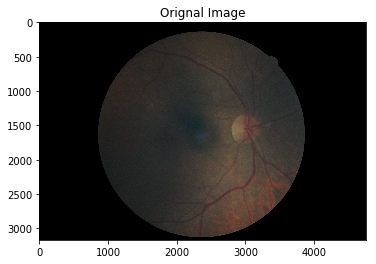

In [15]:
im = plt.imread(B_df['path'][1]) # reading Image from its path

plt.imshow(im)# show the image
plt.title("Orignal Image")
plt.show()

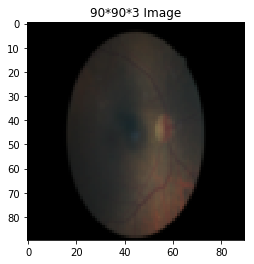

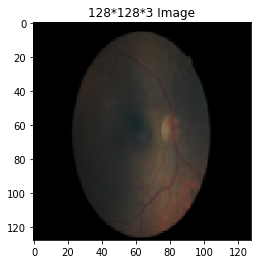

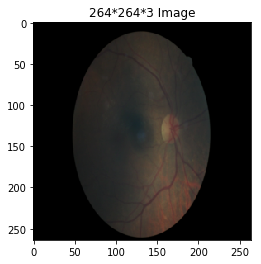

In [16]:
plt.title("90*90*3 Image")
plt.imshow(X_90[1])
plt.show()

plt.title("128*128*3 Image")
plt.imshow(X_128[1])
plt.show()

plt.title("264*264*3 Image")
plt.imshow(X_264[1])
plt.show()

**Its seem to be same now thats good for us**

**Now I have my X and Y. Now its time for spliting and training**

In [17]:
y.shape

(1000,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_128,y, test_size=0.10, random_state=42)
y_train = to_categorical(y_train, num_classes=2)
y_test_Categorical=to_categorical(y_test)
y_categorical =to_categorical(y)

**CNN MODEL **

In [19]:
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation
from keras import losses
from keras.optimizers import Adam, Adagrad
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import GridSearchCV
import keras
#import talos as ta

**Talos Model For HyperParameter Optimization**

**Talos for hyperparameter tuning**

In [20]:

def Talos_Model(X_train, y_train, X_test, y_test, params):
    #parameters defined
    lr = params['lr']
    epochs=params['epochs']
    dropout_rate=params['dropout']
    optimizer=params['optimizer']
    loss=params['loss']
    last_activation=params['last_activation']
    activation=params['activation']
    clipnorm=params['clipnorm']
    decay=params['decay']
    momentum=params['momentum']
    l1=params['l1']
    l2=params['l2']
    No_of_CONV_and_Maxpool_layers=params['No_of_CONV_and_Maxpool_layers']
    No_of_Dense_Layers =params['No_of_Dense_Layers']
    No_of_Units_in_dense_layers=params['No_of_Units_in_dense_layers']
    Kernal_Size=params['Kernal_Size']
    Conv2d_filters=params['Conv2d_filters']
    pool_size_p=params['pool_size']
    padding_p=params['padding']
    
    #model sequential
    model=Sequential()
    
    for i in range(0,No_of_CONV_and_Maxpool_layers):
        model.add(Conv2D(Conv2d_filters, Kernal_Size ,padding=padding_p))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=pool_size_p,strides=(2,2)))
    
    
    model.add(Flatten())
    
    for i in range (0,No_of_Dense_Layers):
        model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))
    
    
    model.add(Dense(units=20,activation=activation))
    
    model.add(Dense(units=2,activation=activation))
    if optimizer=="Adam":
        opt=keras.optimizers.Adam(lr=lr, decay=decay, beta_1=0.9, beta_2=0.999)
    if optimizer=="Adagrad":
        opt=keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=decay)
    if optimizer=="sgd":
        opt=keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    
    model.compile(loss=loss,optimizer=opt,
                 metrics=['accuracy'])
    
    out = model.fit(X_train, y_train, epochs=params['epochs'])

    return out,model

**Hyperparameter Tuning  by using Talos**

[https://github.com/autonomio/talos/blob/master/examples/Hyperparameter%20Optimization%20with%20Keras%20for%20the%20Iris%20Prediction.ipynb](http://)

In [21]:


params = {'lr': (0.1, 0.01,1 ),
     'epochs': [10,5,15],
     'dropout': (0, 0.40, 0.8),
     'optimizer': ["Adam","Adagrad","sgd"],
     'loss': ["binary_crossentropy","mean_squared_error","mean_absolute_error"],
     'last_activation': ["softmax","sigmoid"],
     'activation' :["relu","selu","linear"],
     'clipnorm':(0.0,0.5,1),
     'decay':(1e-6,1e-4,1e-2),
     'momentum':(0.9,0.5,0.2),
     'l1': (0.01,0.001,0.0001),
     'l2': (0.01,0.001,0.0001),
     'No_of_CONV_and_Maxpool_layers':[2,3],
     'No_of_Dense_Layers': [2,3,4],
     'No_of_Units_in_dense_layers':[128,64,32,256],
     'Kernal_Size':[(2,2),(4,4),(6,6)],
     'Conv2d_filters':[60,40,80,120],
     'pool_size':[(2,2),(4,4)],
     'padding':["valid","same"]
    }


Talos take 1500 different scans which is so much expansive even my kaggle kernal die because of talos scans 

**You can convert below cell from markdown to code and check talos scans**

h = ta.Scan(X_train, y_train, params=params,
            model=Talos_Model,
            dataset_name='DR',
            experiment_no='1',
            grid_downsample=.01)

**Reporting of talos library**

accessing the results data frame
h.data.head()

accessing epoch entropy values for each round
h.peak_epochs_df

access the summary details
h.details

r = ta.Reporting(h)

r.best_params()



**Randomized Search For Hyperparameter tuning**

**Model**

In [22]:

def Randomized_Model(lr=0.01,dropout=0.5,optimizer="adam",loss='mean_squared_error',
                    last_activation="softmax",activation="relu",clipnorm=0.1,
                    decay=1e-2,momentum=0.5,l1=0.01,l2=0.001,No_of_CONV_and_Maxpool_layers=3,
                    No_of_Dense_Layers=3,No_of_Units_in_dense_layers=24,Conv2d_filters=60):
       
    
    
    #model sequential
    model=Sequential()
    
    for i in range(0,No_of_CONV_and_Maxpool_layers):
        model.add(Conv2D(Conv2d_filters, (2,2) ,padding="same"))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    
    model.add(Flatten())
    
    for i in range (0,No_of_Dense_Layers):
        model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))
    
    model.add(Dropout(dropout))
    model.add(Dense(units=20,activation=activation))
    
    model.add(Dense(units=2,activation=activation))
    if optimizer=="Adam":
        opt=keras.optimizers.Adam(lr=lr, decay=decay, beta_1=0.9, beta_2=0.999)
    if optimizer=="Adagrad":
        opt=keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=decay)
    if optimizer=="sgd":
        opt=keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    
    model.compile(loss=loss,optimizer=opt,
                 metrics=['accuracy'])
    
    

    return model

**Parameters of Randomized Search**

In [23]:


params = {'lr': (0.1, 0.01,1,0.001 ),
     'epochs': [10,5,15,30],
     'dropout': (0, 0.40, 0.8),
     'optimizer': ["Adam","Adagrad","sgd"],
     'loss': ["binary_crossentropy","mean_squared_error","mean_absolute_error"],
     'last_activation': ["softmax","sigmoid"],
     'activation' :["relu","selu","linear"],
     'clipnorm':(0.0,0.5,1),
     'decay':(1e-6,1e-4,1e-2),
     'momentum':(0.9,0.5,0.2),
     'l1': (0.01,0.001,0.0001),
     'l2': (0.01,0.001,0.0001),
     'No_of_CONV_and_Maxpool_layers':[2,3],
     'No_of_Dense_Layers': [2,3,4,5],
     'No_of_Units_in_dense_layers':[128,64,32,256],
     
     'Conv2d_filters':[60,40,80,120,220]
     
     
    }


In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer
# model class to use in the scikit random search CV 
model = KerasClassifier(build_fn=Randomized_Model, epochs=10, batch_size=20, verbose=1)
grid = RandomizedSearchCV(estimator=model, cv=KFold(3), param_distributions=params, 
                          verbose=20,  n_iter=10, n_jobs=1)


In [25]:
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] optimizer=Adagrad, momentum=0.9, lr=0.01, loss=mean_absolute_error, last_activation=softmax, l2=0.001, l1=0.001, epochs=15, dropout=0.8, decay=0.01, clipnorm=1, activation=relu, No_of_Units_in_dense_layers=64, No_of_Dense_Layers=2, No_of_CONV_and_Maxpool_layers=2, Conv2d_filters=60 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/15
600/600 [==============================] - 3s 5ms/step - loss: 0.7850 - acc: 0.7250
Epoch 2/15
600/600 [==============================] - 0s 633us/step - loss: 0.5199 - acc: 0.7267
Epoch 3/15
600/600 [==============================] - 0s 640us/step - loss: 0.4655 - acc: 0.7267
Epoch 4/15
600/600 [==============================] - 0s 641us/step - loss: 0.4387 - acc: 0.7267
Epoch 5/15
600/600 [==============================] - 0s 637us/step - loss: 0.4067 - acc: 0.7267
Epoch 6/15
600/600 [==============================] - 0s 638us/step - loss: 0.4049 - acc: 0.7267
Epoch 7/15
600/600 [==============================] - 0s 650us/step - loss: 0.3848 - acc: 0.7267
Epoch 8/15
600/600 [==============================] - 0s 636us/step - loss: 0.3771 - acc: 0.7267
Epoch 9/15
600/600 [==============================] - 0s 639us/step - loss: 0.3738 - acc: 0.7267
Epoch 10/15
600/600 [==============================] - 0s 637us/step - loss: 0.3717 - acc: 0.7267
Epoch 11/15
600/600 [==========

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 1s 2ms/step - loss: 0.8271 - acc: 0.7133
Epoch 2/15
600/600 [==============================] - 0s 643us/step - loss: 0.4944 - acc: 0.7333
Epoch 3/15
600/600 [==============================] - 0s 642us/step - loss: 0.4308 - acc: 0.7333
Epoch 4/15
600/600 [==============================] - 0s 639us/step - loss: 0.3988 - acc: 0.7333
Epoch 5/15
600/600 [==============================] - 0s 638us/step - loss: 0.3957 - acc: 0.7333
Epoch 6/15
600/600 [==============================] - 0s 644us/step - loss: 0.3774 - acc: 0.7333
Epoch 7/15
600/600 [==============================] - 0s 637us/step - loss: 0.3667 - acc: 0.7333
Epoch 8/15
600/600 [==============================] - 0s 638us/step - loss: 0.3713 - acc: 0.7333
Epoch 9/15
600/600 [==============================] - 0s 640us/step - loss: 0.3611 - acc: 0.7333
Epoch 10/15
600/600 [==============================] - 0s 642us/step - loss: 0.3522 - acc: 0.7333
Epoch 11/15
600/600 [==========

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.9s remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 1s 2ms/step - loss: 0.8967 - acc: 0.7400
Epoch 2/15
600/600 [==============================] - 0s 638us/step - loss: 0.4832 - acc: 0.7500
Epoch 3/15
600/600 [==============================] - 0s 639us/step - loss: 0.4286 - acc: 0.7500
Epoch 4/15
600/600 [==============================] - 0s 661us/step - loss: 0.3967 - acc: 0.7500
Epoch 5/15
600/600 [==============================] - 0s 666us/step - loss: 0.3880 - acc: 0.7500
Epoch 6/15
600/600 [==============================] - 0s 663us/step - loss: 0.3723 - acc: 0.7500
Epoch 7/15
600/600 [==============================] - 0s 660us/step - loss: 0.3633 - acc: 0.7500
Epoch 8/15
600/600 [==============================] - 0s 667us/step - loss: 0.3521 - acc: 0.7500
Epoch 9/15
600/600 [==============================] - 0s 669us/step - loss: 0.3459 - acc: 0.7500
Epoch 10/15
600/600 [==============================] - 0s 663us/step - loss: 0.3503 - acc: 0.7500
Epoch 11/15
600/600 [==========

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.8s remaining:    0.0s


Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 826782679658106496.0000 - acc: 0.7217
Epoch 2/30
600/600 [==============================] - 1s 847us/step - loss: 2561.2575 - acc: 0.7267
Epoch 3/30
600/600 [==============================] - 1s 885us/step - loss: 2411.4412 - acc: 0.7267
Epoch 4/30
600/600 [==============================] - 1s 845us/step - loss: 2365.6994 - acc: 0.7267
Epoch 5/30
600/600 [==============================] - 1s 858us/step - loss: 2335.7634 - acc: 0.7267
Epoch 6/30
600/600 [==============================] - 0s 817us/step - loss: 2312.5829 - acc: 0.7267
Epoch 7/30
600/600 [==============================] - 0s 810us/step - loss: 2294.5662 - acc: 0.7267
Epoch 8/30
600/600 [==============================] - 0s 807us/step - loss: 2278.7650 - acc: 0.7267
Epoch 9/30
600/600 [==============================] - 0s 810us/step - loss: 2265.6854 - acc: 0.7267
Epoch 10/30
600/600 [==============================] - 0s 811us/step - loss: 2254.7389 -

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   42.2s remaining:    0.0s


Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 3381899268693533696.0000 - acc: 0.7167
Epoch 2/30
600/600 [==============================] - 0s 813us/step - loss: 2480.7031 - acc: 0.7333
Epoch 3/30
600/600 [==============================] - 0s 812us/step - loss: 2535.1841 - acc: 0.7333
Epoch 4/30
600/600 [==============================] - 0s 810us/step - loss: 2527.4060 - acc: 0.7333
Epoch 5/30
600/600 [==============================] - 0s 817us/step - loss: 2520.7608 - acc: 0.7333
Epoch 6/30
600/600 [==============================] - 0s 818us/step - loss: 2516.1162 - acc: 0.7333
Epoch 7/30
600/600 [==============================] - 0s 820us/step - loss: 2512.6714 - acc: 0.7333
Epoch 8/30
600/600 [==============================] - 0s 814us/step - loss: 2509.9799 - acc: 0.7333
Epoch 9/30
600/600 [==============================] - 0s 813us/step - loss: 2507.7961 - acc: 0.7333
Epoch 10/30
600/600 [==============================] - 0s 806us/step - loss: 2505.9739 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.3s remaining:    0.0s


Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 760439437476692224.0000 - acc: 0.7383
Epoch 2/30
600/600 [==============================] - 0s 813us/step - loss: 343878.2865 - acc: 0.7500
Epoch 3/30
600/600 [==============================] - 0s 814us/step - loss: 320029.3250 - acc: 0.7500
Epoch 4/30
600/600 [==============================] - 0s 823us/step - loss: 305987.2896 - acc: 0.7500
Epoch 5/30
600/600 [==============================] - 0s 817us/step - loss: 292557.3302 - acc: 0.7500
Epoch 6/30
600/600 [==============================] - 0s 808us/step - loss: 279302.7333 - acc: 0.7500
Epoch 7/30
600/600 [==============================] - 0s 814us/step - loss: 267434.7411 - acc: 0.7500
Epoch 8/30
600/600 [==============================] - 0s 821us/step - loss: 263550.6875 - acc: 0.7500
Epoch 9/30
600/600 [==============================] - 0s 818us/step - loss: 261682.0818 - acc: 0.7500
Epoch 10/30
600/600 [==============================] - 0s 812us/step - l

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.3min remaining:    0.0s


Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 8.7464 - acc: 0.0242
Epoch 2/30
600/600 [==============================] - 1s 1ms/step - loss: 6.2371 - acc: 0.0158
Epoch 3/30
600/600 [==============================] - 1s 998us/step - loss: 157.4676 - acc: 0.0167
Epoch 4/30
600/600 [==============================] - 1s 1ms/step - loss: 15.8339 - acc: 0.0108
Epoch 5/30
600/600 [==============================] - 1s 995us/step - loss: 16.4891 - acc: 0.0158
Epoch 6/30
600/600 [==============================] - 1s 1ms/step - loss: 16.3127 - acc: 0.0150
Epoch 7/30
600/600 [==============================] - 1s 1ms/step - loss: 17.4222 - acc: 0.0067
Epoch 8/30
600/600 [==============================] - 1s 997us/step - loss: 17.3304 - acc: 0.0092
Epoch 9/30
600/600 [==============================] - 1s 997us/step - loss: 17.1232 - acc: 8.3333e-04
Epoch 10/30
600/600 [==============================] - 1s 996us/step - loss: 16.4779 - acc: 0.0042
Epoch 11/30
600/600 [=====

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.6min remaining:    0.0s


Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 7.5810 - acc: 0.0358
Epoch 2/30
600/600 [==============================] - 1s 1ms/step - loss: 10.1878 - acc: 0.0258
Epoch 3/30
600/600 [==============================] - 1s 1ms/step - loss: 14475083988840.9121 - acc: 0.0117
Epoch 4/30
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 5/30
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 6/30
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 7/30
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 8/30
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 9/30
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 10/30
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 11/30
600/600 [=======

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.0min remaining:    0.0s


Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 8.4008 - acc: 0.0292
Epoch 2/30
600/600 [==============================] - 1s 998us/step - loss: 9.5172 - acc: 0.0067
Epoch 3/30
600/600 [==============================] - 1s 1ms/step - loss: 6.0764 - acc: 0.0142
Epoch 4/30
600/600 [==============================] - 1s 994us/step - loss: 6.1349 - acc: 0.0058
Epoch 5/30
600/600 [==============================] - 1s 995us/step - loss: 5.8796 - acc: 0.0100
Epoch 6/30
600/600 [==============================] - 1s 1ms/step - loss: 6.0054 - acc: 0.0083
Epoch 7/30
600/600 [==============================] - 1s 992us/step - loss: 5.5163 - acc: 0.0117
Epoch 8/30
600/600 [==============================] - 1s 991us/step - loss: 5.4479 - acc: 0.0058
Epoch 9/30
600/600 [==============================] - 1s 991us/step - loss: 6.2427 - acc: 0.0050
Epoch 10/30
600/600 [==============================] - 1s 1ms/step - loss: 7.4329 - acc: 0.0067
Epoch 11/30
600/600 [================

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.3min remaining:    0.0s


Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 43218145408696935564443648.0000 - acc: 0.3600
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 42530120537966206907318272.0000 - acc: 0.3383
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 40908260355467037825302528.0000 - acc: 0.3683
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 37986857720687059387023360.0000 - acc: 0.3533
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 37754558103151139360866304.0000 - acc: 0.3783
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 37156487143888227546431488.0000 - acc: 0.3500
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 37767991483354213922111488.0000 - acc: 0.3483
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 37401384273536386464743424.0000 - acc: 0.3733
Epoch 9/10
600/600 [====================

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.5min remaining:    0.0s


Epoch 1/10
600/600 [==============================] - 4s 7ms/step - loss: 1008112730963418747502592.0000 - acc: 0.6750
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 371212943878983312736256.0000 - acc: 0.7083
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 269132376744047329411072.0000 - acc: 0.7183
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 214820864556041968287744.0000 - acc: 0.7117
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 177915303458981780914176.0000 - acc: 0.7117
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 148769876565205211676672.0000 - acc: 0.7100
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 137850971326239482052608.0000 - acc: 0.7083
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 130742662462503613628416.0000 - acc: 0.7217
Epoch 9/10
600/600 [==============================] - 1

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  2.7min remaining:    0.0s


Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 32097774492333395754876928.0000 - acc: 0.3217
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 26354415117519996571353088.0000 - acc: 0.3750
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 24292141764134058932043776.0000 - acc: 0.3683
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 21907577908692637861281792.0000 - acc: 0.3583
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 21768576638457975102504960.0000 - acc: 0.4017
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 22849358403369690904657920.0000 - acc: 0.3733
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 22355143746947911207878656.0000 - acc: 0.3717
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 21519639191473707812913152.0000 - acc: 0.3867
Epoch 9/10
600/600 [====================

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.9min remaining:    0.0s


Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 15894813090824769536.0000 - acc: 0.7083
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 1785.7392 - acc: 0.7267
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 1783.8808 - acc: 0.7267
Epoch 4/5
600/600 [==============================] - 1s 2ms/step - loss: 1783.6314 - acc: 0.7267
Epoch 5/5
600/600 [==============================] - 1s 855us/step
[CV]  optimizer=Adagrad, momentum=0.9, lr=1, loss=mean_squared_error, last_activation=sigmoid, l2=0.001, l1=0.01, epochs=5, dropout=0.8, decay=0.01, clipnorm=0.0, activation=relu, No_of_Units_in_dense_layers=128, No_of_Dense_Layers=2, No_of_CONV_and_Maxpool_layers=3, Conv2d_filters=220, score=0.7566666642824809, total=  10.1s
[CV] optimizer=Adagrad, momentum=0.9, lr=1, loss=mean_squared_error, last_activation=sigmoid, l2=0.001, l1=0.01, epochs=5, dropout=0.8, decay=0.01, clipnorm=0.0, activation=relu, No_of_Units_in_dense_l

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  3.1min remaining:    0.0s


Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 184656138246147342336.0000 - acc: 0.7150
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 775491.4458 - acc: 0.7333
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 556019.5500 - acc: 0.7333
Epoch 4/5
600/600 [==============================] - 1s 2ms/step - loss: 823373277050.4115 - acc: 0.7300
Epoch 5/5
600/600 [==============================] - 1s 848us/step
[CV]  optimizer=Adagrad, momentum=0.9, lr=1, loss=mean_squared_error, last_activation=sigmoid, l2=0.001, l1=0.01, epochs=5, dropout=0.8, decay=0.01, clipnorm=0.0, activation=relu, No_of_Units_in_dense_layers=128, No_of_Dense_Layers=2, No_of_CONV_and_Maxpool_layers=3, Conv2d_filters=220, score=0.7433333357175191, total=  10.4s
[CV] optimizer=Adagrad, momentum=0.9, lr=1, loss=mean_squared_error, last_activation=sigmoid, l2=0.001, l1=0.01, epochs=5, dropout=0.8, decay=0.01, clipnorm=0.0, activation=relu, No_of_Uni

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  3.3min remaining:    0.0s


Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 994954720801239424.0000 - acc: 0.7383
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 1820.6158 - acc: 0.7500
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 1791.6451 - acc: 0.7500
Epoch 4/5
600/600 [==============================] - 1s 2ms/step - loss: 1773.4355 - acc: 0.7500
Epoch 5/5
600/600 [==============================] - 0s 833us/step
[CV]  optimizer=Adagrad, momentum=0.9, lr=1, loss=mean_squared_error, last_activation=sigmoid, l2=0.001, l1=0.01, epochs=5, dropout=0.8, decay=0.01, clipnorm=0.0, activation=relu, No_of_Units_in_dense_layers=128, No_of_Dense_Layers=2, No_of_CONV_and_Maxpool_layers=3, Conv2d_filters=220, score=0.7099999944368999, total=  10.1s
[CV] optimizer=Adam, momentum=0.5, lr=1, loss=mean_absolute_error, last_activation=softmax, l2=0.01, l1=0.01, epochs=15, dropout=0.8, decay=1e-06, clipnorm=1, activation=linear, No_of_Units_in_dense_laye

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.4min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 5s 8ms/step - loss: 4067123992303.5522 - acc: 0.5267
Epoch 2/15
600/600 [==============================] - 1s 1ms/step - loss: 183058771899.7333 - acc: 0.5200
Epoch 3/15
600/600 [==============================] - 1s 1ms/step - loss: 10959069499.7333 - acc: 0.4383
Epoch 4/15
600/600 [==============================] - 1s 1ms/step - loss: 1718416537.6000 - acc: 0.5050
Epoch 5/15
600/600 [==============================] - 1s 1ms/step - loss: 569402747.7333 - acc: 0.5217
Epoch 6/15
600/600 [==============================] - 1s 1ms/step - loss: 601407464.0000 - acc: 0.5433
Epoch 7/15
600/600 [==============================] - 1s 1ms/step - loss: 543106064.0000 - acc: 0.5167
Epoch 8/15
600/600 [==============================] - 1s 1ms/step - loss: 489062089.6000 - acc: 0.5000
Epoch 9/15
600/600 [==============================] - 1s 1ms/step - loss: 289930507.7333 - acc: 0.5017
Epoch 10/15
600/600 [==============================] - 1s 1ms/s

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  3.7min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 5s 8ms/step - loss: 11088673636352.5664 - acc: 0.4783
Epoch 2/15
600/600 [==============================] - 1s 1ms/step - loss: 1949142201139.2000 - acc: 0.4983
Epoch 3/15
600/600 [==============================] - 1s 1ms/step - loss: 67971498188.8000 - acc: 0.4867
Epoch 4/15
600/600 [==============================] - 1s 1ms/step - loss: 13276721058.1333 - acc: 0.5017
Epoch 5/15
600/600 [==============================] - 1s 1ms/step - loss: 5448505949.8667 - acc: 0.4867
Epoch 6/15
600/600 [==============================] - 1s 1ms/step - loss: 5856715340.8000 - acc: 0.4867
Epoch 7/15
600/600 [==============================] - 1s 1ms/step - loss: 6036143104.0000 - acc: 0.5167
Epoch 8/15
600/600 [==============================] - 1s 1ms/step - loss: 3113210193.0667 - acc: 0.5217
Epoch 9/15
600/600 [==============================] - 1s 1ms/step - loss: 1876242423.4667 - acc: 0.5000
Epoch 10/15
600/600 [==============================] - 

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  4.0min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 5s 9ms/step - loss: 3024212484642.6885 - acc: 0.4983
Epoch 2/15
600/600 [==============================] - 1s 1ms/step - loss: 136581816524.8000 - acc: 0.5517
Epoch 3/15
600/600 [==============================] - 1s 1ms/step - loss: 8477123652.2667 - acc: 0.4950
Epoch 4/15
600/600 [==============================] - 1s 1ms/step - loss: 1944578086.4000 - acc: 0.5267
Epoch 5/15
600/600 [==============================] - 1s 1ms/step - loss: 1251529623.4667 - acc: 0.5183
Epoch 6/15
600/600 [==============================] - 1s 1ms/step - loss: 663419534.9333 - acc: 0.5017
Epoch 7/15
600/600 [==============================] - 1s 1ms/step - loss: 517090605.8667 - acc: 0.5200
Epoch 8/15
600/600 [==============================] - 1s 1ms/step - loss: 431869242.6667 - acc: 0.5300
Epoch 9/15
600/600 [==============================] - 1s 1ms/step - loss: 302902069.8667 - acc: 0.5100
Epoch 10/15
600/600 [==============================] - 1s 1ms/s

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  4.2min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 3s 5ms/step - loss: 6.6781 - acc: 0.3825
Epoch 2/15
600/600 [==============================] - 0s 587us/step - loss: 4.1720 - acc: 0.5125
Epoch 3/15
600/600 [==============================] - 0s 590us/step - loss: 2.3881 - acc: 0.6367
Epoch 4/15
600/600 [==============================] - 0s 597us/step - loss: 1.9265 - acc: 0.7233
Epoch 5/15
600/600 [==============================] - 0s 586us/step - loss: 1.8515 - acc: 0.7208
Epoch 6/15
600/600 [==============================] - 0s 599us/step - loss: 1.8183 - acc: 0.7250
Epoch 7/15
600/600 [==============================] - 0s 592us/step - loss: 1.7923 - acc: 0.7267
Epoch 8/15
600/600 [==============================] - 0s 589us/step - loss: 1.7737 - acc: 0.7267
Epoch 9/15
600/600 [==============================] - 0s 593us/step - loss: 1.7626 - acc: 0.7258
Epoch 10/15
600/600 [==============================] - 0s 589us/step - loss: 1.7559 - acc: 0.7275
Epoch 11/15
600/600 [==========

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  4.4min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 10.5254 - acc: 0.1600
Epoch 2/15
600/600 [==============================] - 0s 653us/step - loss: 3.9017 - acc: 0.5392
Epoch 3/15
600/600 [==============================] - 0s 616us/step - loss: 1.9702 - acc: 0.6850
Epoch 4/15
600/600 [==============================] - 0s 616us/step - loss: 1.8754 - acc: 0.7117
Epoch 5/15
600/600 [==============================] - 0s 628us/step - loss: 1.8356 - acc: 0.7275
Epoch 6/15
600/600 [==============================] - 0s 617us/step - loss: 1.8004 - acc: 0.7325
Epoch 7/15
600/600 [==============================] - 0s 618us/step - loss: 1.7798 - acc: 0.7342
Epoch 8/15
600/600 [==============================] - 0s 622us/step - loss: 1.7658 - acc: 0.7333
Epoch 9/15
600/600 [==============================] - 0s 609us/step - loss: 1.7542 - acc: 0.7333
Epoch 10/15
600/600 [==============================] - 0s 589us/step - loss: 1.7470 - acc: 0.7333
Epoch 11/15
600/600 [=========

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.6min finished


Epoch 1/15
900/900 [==============================] - 4s 5ms/step - loss: 0.6998 - acc: 0.7267
Epoch 2/15
900/900 [==============================] - 1s 697us/step - loss: 0.5719 - acc: 0.7367
Epoch 3/15
900/900 [==============================] - 1s 694us/step - loss: 0.5529 - acc: 0.7367
Epoch 4/15
900/900 [==============================] - 1s 693us/step - loss: 0.5432 - acc: 0.7367
Epoch 5/15
900/900 [==============================] - 1s 693us/step - loss: 0.5372 - acc: 0.7367
Epoch 6/15
900/900 [==============================] - 1s 687us/step - loss: 0.5331 - acc: 0.7367
Epoch 7/15
900/900 [==============================] - 1s 691us/step - loss: 0.5301 - acc: 0.7367
Epoch 8/15
900/900 [==============================] - 1s 692us/step - loss: 0.5277 - acc: 0.7367
Epoch 9/15
900/900 [==============================] - 1s 689us/step - loss: 0.5259 - acc: 0.7367
Epoch 10/15
900/900 [==============================] - 1s 689us/step - loss: 0.5244 - acc: 0.7367
Epoch 11/15
900/900 [==========

**Best Params of Randomized search**

In [26]:
best_params=grid_result.best_params_
best_params

{'optimizer': 'Adagrad',
 'momentum': 0.9,
 'lr': 0.01,
 'loss': 'mean_absolute_error',
 'last_activation': 'softmax',
 'l2': 0.001,
 'l1': 0.001,
 'epochs': 15,
 'dropout': 0.8,
 'decay': 0.01,
 'clipnorm': 1,
 'activation': 'relu',
 'No_of_Units_in_dense_layers': 64,
 'No_of_Dense_Layers': 2,
 'No_of_CONV_and_Maxpool_layers': 2,
 'Conv2d_filters': 60}

In [27]:

from sklearn.metrics import accuracy_score

y=grid_result.predict(X_test)
random=accuracy_score(y, y_test)
print("Base Accuracy ",random)

best_random = grid_result.best_estimator_
y1=best_random.predict(X_test)
Best=accuracy_score(y1, y_test)
print("Best Accuracy " ,Best)


print('Improvement of {:0.2f}%.'.format( 100 * (Best - random) / random))

100/100 [==============================] - 1s 14ms/step
Base Accuracy  0.76
100/100 [==============================] - 0s 340us/step
Best Accuracy  0.76
Improvement of 0.00%.


In [28]:
def Best_param_Model(best_params):
       
    lr=best_params["lr"]
    dropout=best_params["dropout"]
    optimizer=best_params["optimizer"]
    loss=best_params["loss"]
    last_activation=best_params["last_activation"]
    activation=best_params["activation"]
    clipnorm=best_params["clipnorm"]
    decay=best_params["decay"]
    momentum=best_params["momentum"]
    l1=best_params["l1"]
    l2=best_params["l2"]
    No_of_CONV_and_Maxpool_layers=best_params["No_of_CONV_and_Maxpool_layers"]
    No_of_Dense_Layers=best_params["No_of_Dense_Layers"]
    No_of_Units_in_dense_layers=best_params["No_of_Units_in_dense_layers"]
    Conv2d_filters=best_params["Conv2d_filters"]
    
    #model sequential
    model=Sequential()
    
    for i in range(0,No_of_CONV_and_Maxpool_layers):
        model.add(Conv2D(Conv2d_filters, (2,2) ,padding="same"))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    
    model.add(Flatten())
    
    for i in range (0,No_of_Dense_Layers):
        model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))
    
    
    model.add(Dense(units=20,activation=activation))
    
    model.add(Dense(units=2,activation=activation))
    if optimizer=="Adam":
        opt=keras.optimizers.Adam(lr=lr, decay=decay, beta_1=0.9, beta_2=0.999)
    if optimizer=="Adagrad":
        opt=keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=decay)
    if optimizer=="sgd":
        opt=keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    
    model.compile(loss=loss,optimizer=opt,
                 metrics=['accuracy'])
    
    

    return model

Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 5s 5ms/step - loss: 0.7863 - acc: 0.7311 - val_loss: 0.5776 - val_acc: 0.7600
Epoch 2/100
900/900 [==============================] - 1s 626us/step - loss: 0.5648 - acc: 0.7367 - val_loss: 0.5542 - val_acc: 0.7600
Epoch 3/100
900/900 [==============================] - 1s 625us/step - loss: 0.5486 - acc: 0.7367 - val_loss: 0.5434 - val_acc: 0.7600
Epoch 4/100
900/900 [==============================] - 1s 621us/step - loss: 0.5402 - acc: 0.7367 - val_loss: 0.5370 - val_acc: 0.7600
Epoch 5/100
900/900 [==============================] - 1s 628us/step - loss: 0.5349 - acc: 0.7367 - val_loss: 0.5327 - val_acc: 0.7600
Epoch 6/100
900/900 [==============================] - 1s 619us/step - loss: 0.5312 - acc: 0.7367 - val_loss: 0.5297 - val_acc: 0.7600
Epoch 7/100
900/900 [==============================] - 1s 627us/step - loss: 0.5285 - acc: 0.7367 - val_loss: 0.5273 - val_acc: 0.7600
Epoch 8/100

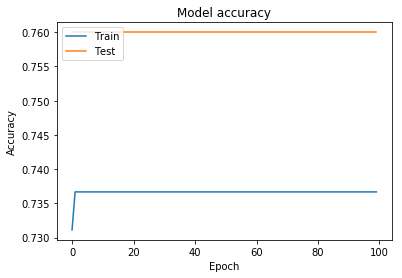

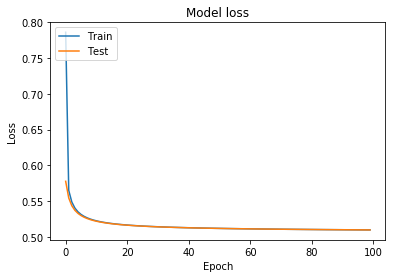

In [29]:

Binary_model=Best_param_Model(best_params)
history =Binary_model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test_Categorical))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])


plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
Binary_model.evaluate(X_test,y_test_Categorical)

100/100 [==============================] - 0s 396us/step


[0.5095557570457458, 0.76]

**Visualizing my CNN model**

In [31]:
y=B_df['level'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_128,y, test_size=0.10, random_state=42)
y_train = to_categorical(y_train, num_classes=2)
y_test_Categorical=to_categorical(y_test)

In [32]:

model = Sequential()
model.add(Conv2D(16,kernel_size = (5,5),activation = 'relu', activity_regularizer=regularizers.l2(1e-8)))
model.add(Conv2D(32,kernel_size = (5,5),activation = 'relu', activity_regularizer = regularizers.l2(1e-8)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(64,kernel_size = (5,5),activation = 'relu', activity_regularizer = regularizers.l2(1e-8)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(128,activation = 'relu',kernel_size = (3,3),activity_regularizer = regularizers.l2(1e-8)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(64,activation = 'tanh',activity_regularizer = regularizers.l2(1e-8)))
model.add(Dropout(0.2))
model.add(Dense(16,activation = 'tanh',activity_regularizer = regularizers.l2(1e-8)))
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'softmax'))
model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train, epochs = 10 ,batch_size = 16,validation_data=(X_test,y_test_Categorical))
model.summary()


Train on 900 samples, validate on 100 samples
Epoch 1/10
900/900 [==============================] - 5s 6ms/step - loss: 0.6007 - acc: 0.7289 - val_loss: 0.5478 - val_acc: 0.7600
Epoch 2/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5887 - acc: 0.7367 - val_loss: 0.5540 - val_acc: 0.7600
Epoch 3/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5859 - acc: 0.7367 - val_loss: 0.5651 - val_acc: 0.7600
Epoch 4/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5846 - acc: 0.7367 - val_loss: 0.5504 - val_acc: 0.7600
Epoch 5/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5825 - acc: 0.7367 - val_loss: 0.5721 - val_acc: 0.7600
Epoch 6/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5791 - acc: 0.7367 - val_loss: 0.5439 - val_acc: 0.7600
Epoch 7/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5838 - acc: 0.7367 - val_loss: 0.5850 - val_acc: 0.7600
Epoch 8/10
900/900 [==========

Accuracy Measures
[Helping Material](http://comprna.upf.edu/courses/Master_AGB/2_ClassificationAlgorithms/Lecture_Accuracy.pdf)

In [33]:
from sklearn.metrics import confusion_matrix
prediction=model.predict(X_test)
y_pred=[]
for i in prediction:
    y_pred.append(i.argmax())
y_pred=np.asarray(y_pred)
true_negative,false_positive,false_negative,true_positive=confusion_matrix(y_test, y_pred).ravel()

print("true_negative: ",true_negative)
print("false_positive: ",false_positive)
print("false_negative: ",false_negative)
print("true_positive: ",true_positive)
print("\n\n Accuracy Measures\n\n")
Sensitivity=true_positive/(true_positive+false_negative)
print("Sensitivity: ",Sensitivity)

False_Positive_Rate=false_positive/(false_positive+true_negative)
print("False_Positive_Rate: ",False_Positive_Rate)

Specificity=true_negative/(false_positive + true_negative)
print("Specificity: ",Specificity)

#FDR à 0 means that very few of our predictions are wrong
False_Discovery_Rate=false_positive/(false_positive+true_positive)
print("False_Discovery_Rate: ",False_Discovery_Rate)

Positive_Predictive_Value =true_positive/(true_positive+false_positive)
print("Positive_Predictive_Value: ",Positive_Predictive_Value)



true_negative:  76
false_positive:  0
false_negative:  24
true_positive:  0


 Accuracy Measures


Sensitivity:  0.0
False_Positive_Rate:  0.0
Specificity:  1.0
False_Discovery_Rate:  nan
Positive_Predictive_Value:  nan


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


**Model is Giving 0% accuracy After all of this If someone know the solution please let me know**
1. According to me less images will be the problem so that cnn is not getting enough images to train their weights well

In [34]:
a=np.expand_dims( X_train[10],axis=0)
a.shape
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(a)


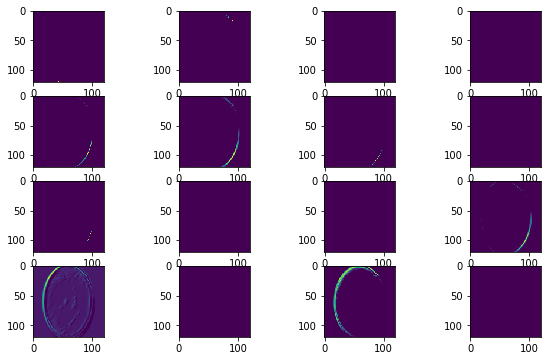

In [35]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1
display_activation(activations, 4, 4,1)

please visualize 1 and 3 shape their will be a 6d array of filters but first 16 filter not present in the weights array

**Visualizing 15th filter of my first cov2d layer**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


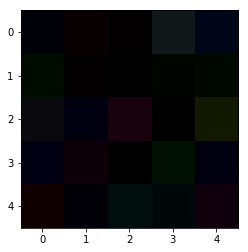

In [36]:
top_layer = model.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :,15 ])

**Achiving 76% accuracy till now on 1000 examples**